In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

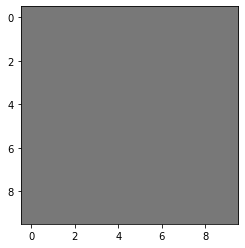

In [2]:
#test algorithm with sample data
test_array = np.full((10,10,3), 120)
plt.imshow(test_array)

In [3]:
#convert from 3-channel rgb to 1 channel:
#nc_array = test_array[:,:,1]
nc_array = np.round(test_array[:,:,1]/255, 1)
nc_array

array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]])

In [4]:
#simple loop:
def get_pixel_value(val):
    if val < 0.5:
        newval = 0
    elif val >= 0.5:
        newval = 1
    return newval

def simple_dither(orig_data):
    data = orig_data.copy()
    for r in range(data.shape[0]-1):
        for c in range(data.shape[1]-1):
            oldval = data[r, c]
            newval = get_pixel_value(oldval)
            quanterror = oldval - newval
            data[r, c] = newval
            data[r  , c+1] = data[r  , c+1] + (7/16)*quanterror
            data[r+1, c-1] = data[r+1, c-1] + (3/16)*quanterror
            data[r+1, c  ] = data[r+1, c  ] + (5/16)*quanterror
            data[r+1, c+1] = data[r+1, c+1] + (1/16)*quanterror
        data[r, data.shape[1]-1] = get_pixel_value(data[r, data.shape[1]-1])
    for c in range(data.shape[1]-1):
        data[data.shape[0]-1, c] = get_pixel_value(data[data.shape[0]-1, c])
    data[data.shape[0]-1, data.shape[1]-1] = get_pixel_value(data[data.shape[0]-1, data.shape[1]-1])
    return data

dithered_test = simple_dither(nc_array)
dithered_test

array([[1., 0., 1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1., 0., 0.]])

In [5]:
#revert data back to 3-channel rgb from 1-channel grayscale
def revert_img(image):
    r = image.shape[0]
    c = image.shape[1]
    new_array = np.empty((r,c,3))
    for i in range(r):
        for j in range(c):
            new_array[i,j,:] = image[i,j]
    return new_array

new_array = revert_img(dithered_test)

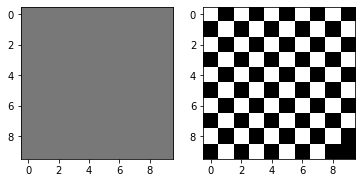

In [6]:
fig = plt.figure()
plt.subplot(1,2,1)
plt.imshow(test_array)

plt.subplot(1,2,2)
plt.imshow(new_array)

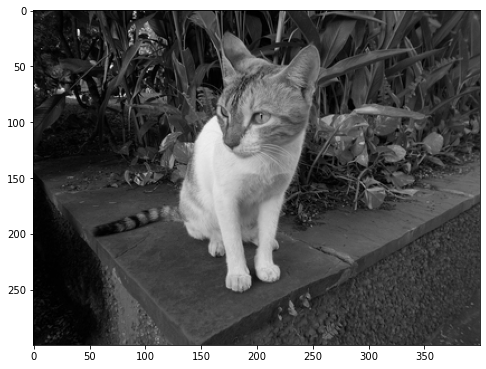

In [8]:
#read in test image
img = Image.open('Test_Image_Cat_Mumbai.jpg')
img_g = img.convert('L')
#img_g.show()  prints in new window

#resize test image
width, height = img_g.size
new_width = 400
new_height = int(height * new_width / width)
img_1 = img_g.resize((new_width, new_height), Image.ANTIALIAS)

fig = plt.figure(figsize=(8, 8))
plt.imshow(img_1, cmap='gray')

In [9]:
print('original image size: ' + str(img_g.size))
print('adjusted image size: ' + str(img_1.size))

original image size: (1200, 900)
adjusted image size: (400, 300)


In [10]:
#perform F-S dithering on image:
img_array = np.asarray(img_1)
img_nc_array = np.round(img_array/255, 3)

dithered_image = simple_dither(img_nc_array)
dithered_image_f = revert_img(dithered_image)

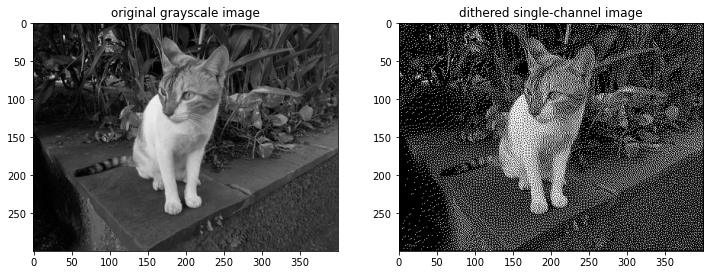

In [18]:
#visualize results
fig = plt.figure(figsize=(12, 12))

plt.subplot(1, 2, 1)
plt.title('original grayscale image')
plt.imshow(img_1, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('dithered single-channel image')
plt.imshow(dithered_image_f)

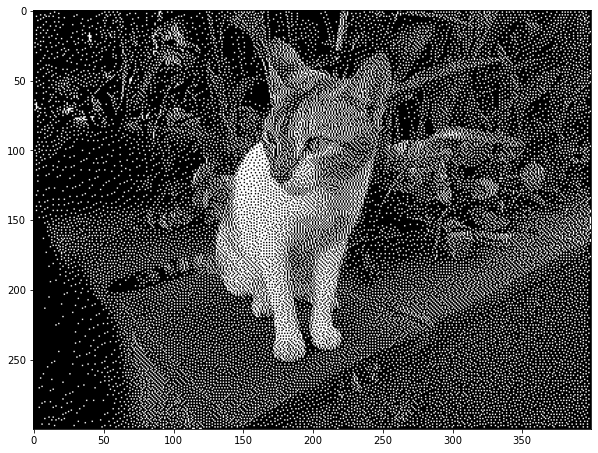

In [12]:
fig = plt.figure(figsize=(10, 10))
plt.imshow(dithered_image_f)